In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy.optimize import curve_fit
import tqdm
from tqdm import trange

# Шаг 1: Создание треугольной решетки
def create_triangular_lattice(rows, columns):
#     lattice = np.random.choice([1, -1], size=(rows, columns))
    lattice = np.ones(shape=(rows, columns))
    return lattice

# Шаг 2: Определение энергии системы
def calculate_energy(lattice):
    energy = 0
    rows, columns = lattice.shape
    for i in range(rows):
        for j in range(columns):
            neighbors = [(i-1, j-1), (i-1, j), (i, j-1), (i, (j+1)%columns), ((i+1)%rows, j), ((i+1)%rows, (j+1)%columns)]
            for neighbor in neighbors:
                energy += lattice[i, j] * lattice[neighbor[0], neighbor[1]]
    return -energy

# Шаг 3: Реализация алгоритма Монте-Карло
def monte_carlo_simulation(lattice, temperature, num_steps):
    rows, columns = lattice.shape
    beta = 1 / temperature
    for _ in range(num_steps):
        i, j = random.randint(0, rows-1), random.randint(0, columns-1)
        neighbors = [(i-1, j-1), (i-1, j), (i, j-1), (i, (j+1)%columns), ((i+1)%rows, j), ((i+1)%rows, (j+1)%columns)]
        dE = 2 * lattice[i, j] * sum([lattice[neighbor[0], neighbor[1]] for neighbor in neighbors])
        if dE <= 0 or random.random() < math.exp(-beta * dE):
            lattice[i, j] *= -1

# Шаг 4: Вычисление физических величин
def calculate_magnetization(lattice):
    return np.sum(lattice)

# Функция для фитирования магнетизации
def critical_temperature(T, Tc, A, B):
    return A * np.abs(Tc - T)**B

In [3]:
temperatures = np.linspace(1,10,10)
magnetizations = []
energies = []

for i in trange(len(temperatures)):
    temperature = temperatures[i]
    rows, columns = 10, 10
    lattice = create_triangular_lattice(rows, columns)
    num_steps = 1000000
    magnetization_data = []

    for step in range(num_steps):
        monte_carlo_simulation(lattice, temperature, 1)
        magnetization = calculate_magnetization(lattice)
        magnetization_data.append(magnetization)

    magnetizations.append(np.mean(magnetization_data))
    energies.append(calculate_energy(lattice))

# Фитирование данных магнетизации
params, covariance = curve_fit(critical_temperature, temperatures, magnetizations, p0=[2.6, 1, 1])
Tc_fit, A_fit, B_fit = params

# Вывод результатов
print("Критическая температура (kBT / J) на основе магнетизации:", Tc_fit)

100%|███████████████████████████████████████████| 10/10 [01:24<00:00,  8.46s/it]

Критическая температура (kBT / J) на основе магнетизации: 7.8935391741126555


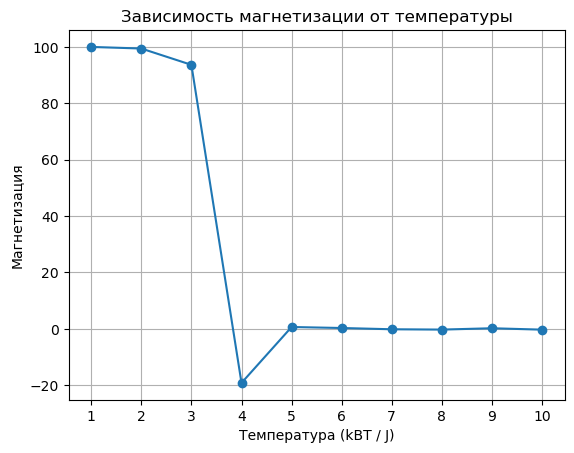

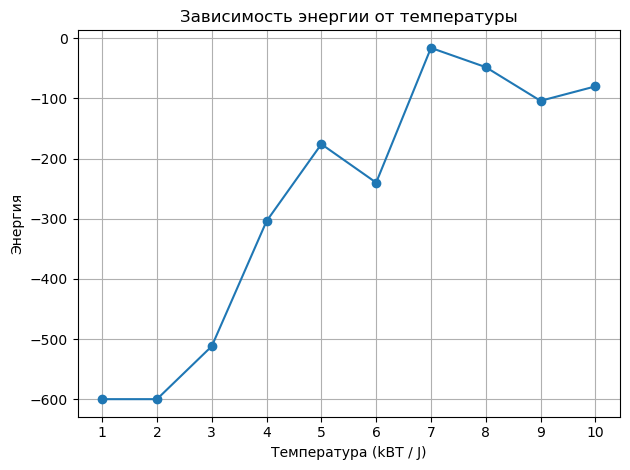

In [4]:
# Постройте графики магнетизации и энергии в зависимости от температ

# plt.figure(figsize=(12, 6))
plt.grid(True)
plt.xticks(temperatures)
# plt.subplot(2, 1, 1)
plt.plot(temperatures, magnetizations, marker='o', linestyle='-')
plt.xlabel('Температура (kBT / J)')
plt.ylabel('Магнетизация')
plt.title('Зависимость магнетизации от температуры')
plt.show()

# plt.subplot(2, 1, 2)
plt.grid(True)
plt.xticks(temperatures)
plt.plot(temperatures, energies, marker='o', linestyle='-')
plt.xlabel('Температура (kBT / J)')
plt.ylabel('Энергия')
plt.title('Зависимость энергии от температуры')

plt.tight_layout()
plt.show()